## Assignment 2 Numpy and pandas

This assignment will contain 3 questions with details as below. The due date is October 9 (Friday), 2020 23:59PM. Each late day will result in 20% loss of total points.

### Question 1 (30 points) Just another ordinary yet least square

Every college student with a business degree may know linear regression pretty well. Essentially, linear regression models the linear regression between a scalar variable (dependent variable) and a list of independent variables, expressed in matrix notation as:

\begin{equation}
\mathbf{y} = X\boldsymbol\theta + \boldsymbol\varepsilon
\end{equation}


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Ordinary least squares (OLS) allows to find the value of $\theta$ as a *closed-form solution* —in other words, a mathematical equation that gives the result directly. This is called
the *Normal Equation*:

\begin{equation}
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^T\cdot y
\end{equation}

**Question 1.1** (5 points): Load the data from ```independent_variable.npy``` and ```dependent_variable.npy```, and list the dimensions of the independent variables and the dependent variable, respectively.

In [18]:
# Loading both files
independent = np.load('independent_variable.npy')
dependent = np.load("dependent_variable.npy")


print("Dimension of the Independent Variable:", independent.shape[0], "rows", independent.shape[1], "columns.")

print("Dimension of the Dependent Variable:", dependent.shape[0], "rows", dependent.shape[1], "columns.")


Dimension of the Independent Variable: 10000 rows 4 columns.
Dimension of the Dependent Variable: 10000 rows 1 columns.


**Question 1.2** (15 points) Now implement the normal equation of Ordinary Least Squres using numpy to estimate the $\theta$. Show the estimated value of $\theta$, denoted as $\hat{\boldsymbol\theta}$. Also perform the Least Squares using ```numpy.polyfit``` function (with polynomial degree of 1), check whether estimated $\theta$ from your own implementation is equal to the estimated value of polynomial regression.

In [25]:

# Multiplying by the transposed X and then inversing the result
transposed_multiplied = np.linalg.inv(np.dot(independent.T, independent))

# Multiplying again by the Transposed
estimated = np.dot(transposed_multiplied,independent.T)

# Multiplied by the dependent variable
estimated_new = np.dot(estimated,dependent)

#Printed the Normal Equation result
print(' Estimated Least Squares:\n', estimated_new)

# Doing it with the linalg function
x = np.linalg.lstsq(independent, dependent, rcond=1)[0]

print('\n Estimated Least Squares by the linalg function:\n', estimated_new)

print("\nSame result, as expected!")


 Estimated Least Squares:
 [[4.08641938]
 [2.98910419]
 [1.98161519]
 [9.99036667]]

 Estimated Least Squares by the linalg function:
 [[4.08641938]
 [2.98910419]
 [1.98161519]
 [9.99036667]]

Same result, as expected!


**Question 1.3** (10 points) Now use the estimated $\hat{\boldsymbol\theta}$ to *predict* the value of $y$ using the equation:

\begin{equation}
\mathbf{\hat{y}} = X\hat{\boldsymbol\theta}
\end{equation}

Calculate the prediction errors the linear regression model has made between the $\hat{y}$ and $y$ as:

\begin{equation}
\mathbf{E} = \sum_{j=0}^n |\hat{y}_j - y_j|^2
\end{equation}


In [40]:
#multiplying the independent variable with estimated teta
estimated_y = np.dot(independent,estimated_new)
estimated_y

error = 0

# loop that goes through the values of y and y(estimated). It the subtracts one from the other, in absolute values, and then the result has exponential = 2
for i in range(0,len(estimated_y)):
    error += abs(estimated_y[i]-dependent[i])**2
                 
print('With the estimated teta with normal equation, the estimated error is:', error)

# Same reasoning but linalg value (same)
estimated_y = np.dot(independent,x)
estimated_y

error = 0

for i in range(0,len(estimated_y)):
    error += abs(estimated_y[i]-dependent[i])**2
                 
print('With the estimated teta with linalg.lstsq:', error)

With the estimated teta with normal equation, the estimated error is: [10116.41274781]
With the estimated teta with linalg.lstsq: [10116.41274781]


### Question 2 (30 points)  Is it Instagrammable?

Consider any photo you take at Carcavelos beach:

![carcavelos](https://www.cm-oeiras.pt/pt/descobrir/patrimonio/PublishingImages/Paginas/fortesaojuliaobarra/CM145328.JPG)

<br>

An image is composed of three matrixes, each one for an RGB (red, green and blue) channel. Each matrix has values between 0 and 255.


![image](https://static.packt-cdn.com/products/9781789613964/graphics/e91171a3-f7ea-411e-a3e1-6d3892b8e1e5.png)

In this exercise, you will apply a filter to the image in a process called convolution. This process uses the filter as a matrix that is multiplied as a sliding window to an image. On the following animation, the filter is represented as yellow, the image channel as green, and the convolution result as red.

![convolution](https://icecreamlabs.com/wp-content/uploads/2018/08/33-con.gif)


Note that the resulting matrix has a smaller shape than the original. To ensure the same shape consider a padding with value 0 that enables the filter to slide through every pixel value as shown in the following image:

<br>

![padding](https://media5.datahacker.rs/2018/11/sl_1.png)

<br><br>

This question requires the `numpy` and `Pillow` libraries that may already be installed on your enviroment. However, if you have a problem importing these libraries, install it via pip. Example for Pillow: `pip install Pillow` 

<br>

Consider the following code to convert an image into a numpy array:

```python
from PIL import Image
from numpy import asarray

# load the image
image = Image.open('carcavelos.jpg')

# convert image to numpy array
data = asarray(image)
```



You can save a numpy array as an image with the following code:

```python
"""
color image
"""

# convert numpy array to image
img = Image.fromarray(data, 'RGB')

# save image and .png
img.save('image.png')

"""
grayscale image
"""

# convert numpy array to image
data = data.astype(np.uint8)
img = Image.fromarray(data)

# save grayscale image as .png
img.save('image.png')
```

Answer the following questions:

**Question 2.1** (5 points) What is the shape of the image? Answer with the shape and indicate what each dimension represents.

In [33]:
from PIL import Image
from numpy import asarray

# load the image
image = Image.open('carcavelos.jpg')

# convert image to numpy array
data = asarray(image)
print(data.shape)


print(f'{data.shape[0]} -> Vertical Dimensions / Height / # of rows')
print(f'{data.shape[1]} -> Horizontal Dimensions / Width / # of columns')
print(f'{data.shape[2]} -> Channels (RGB or Red-Green-Blue)')

(2832, 4256, 3)
2832 -> Vertical Dimensions / Height / # of rows
4256 -> Horizontal Dimensions / Width / # of columns
3 -> Channels (RGB or Red-Green-Blue)


**Question 2.2** (10 points) Save the "carcavelos.jpg" image as a grayscale image into "carcavelos-grayscale.png". The image should result from a numpy array with only one channel instead of 3, consider the following weights for each channel: 0.30*R + 0.59*G + 0.11*B

In [34]:
RGB = np.asarray(Image.open("carcavelos.jpg")) # Read RGB input image and convert to RGB array
RGB = RGB.astype('float') # Convert elements from uint8 to float
R, G, B = RGB[:, :, 0], RGB[:, :, 1], RGB[:, :, 2]  # Split RGB to R, G and B numpy arrays.
L =  R * 0.30 + G * 0.59 + B * 0.11 # Convert to L (select your desired coefficients).
L = Image.fromarray(np.uint8(L)) #Format back to PIL image
L.save('carcavelos-grayscale.png') # Save as carcavelos-grayscale.png


**Question 2.3** (15 points) Apply convolution operations as described above to "carcavelos.jpg". 
1. Save an image into "carcavelos-sharpen.png" with the applied filter: `np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])`
2. Save an image into "carcavelos-blur.png" with the applied filter: `np.array([[1,1,1],[1,1,1],[1,1,1]])/9`

(2832, 4256, 3) -> Shape of matrix was unaltered
(2832, 4256, 3) -> Shape of matrix was unaltered


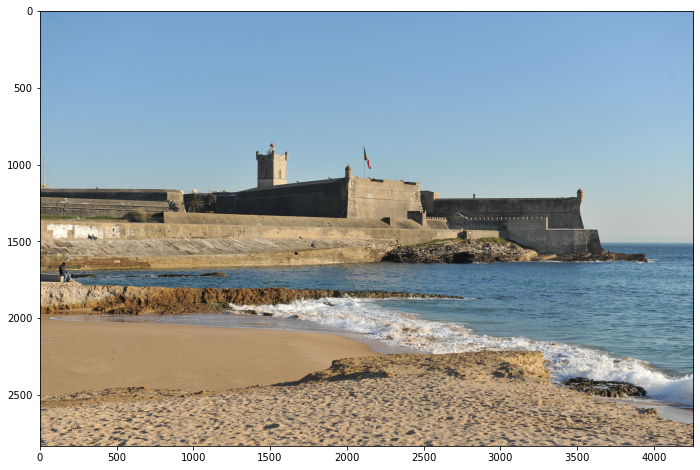

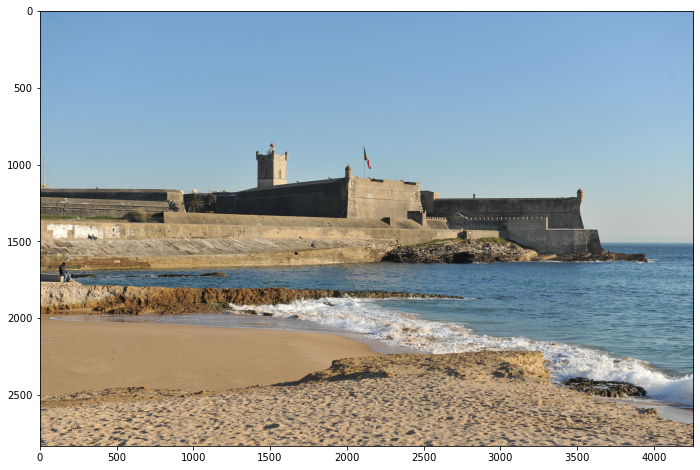

In [37]:
from PIL import Image
from scipy.ndimage import convolve
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image



image = cv2.imread('carcavelos.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape, "-> Shape of matrix was unaltered")
sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
blur = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

img = cv2.filter2D(image, -1, sharpen)


sharpened_img = Image.fromarray(np.uint8(img)) #Format back to PIL image

sharpened_img.save('carcavelos-sharpen.png') # Save as carcavelos-grayscale.png
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

img_blur = cv2.filter2D(image, -1, blur)
blur_img = Image.fromarray(np.uint8(img_blur)) #Format back to PIL image

blur_img.save('carcavelos-blur.png') # Save as carcavelos-grayscale.png
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

print(img_blur.shape, "-> Shape of matrix was unaltered")

### Question 3 My Heart Will Go On (40 points) 

![](https://camo.githubusercontent.com/78ca11f9a2e6c36bbee928124a7d3f9abc3abb2b/68747470733a2f2f696d672d73332e6f6e6564696f2e636f6d2f69642d3537616336353563393365613835613733323935343639652f7265762d302f7261772f732d613730613530323939633033303464336535383266356230373338613366653730396533613564662e6a7067)

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.  Incorporating both historical and fictionalized aspects, the film Titanic is a 1997 American epic romance and disaster film based on accounts of the sinking of the RMS Titanic directed, written, co-produced, and co-edited by James Cameron, and stars Leonardo DiCaprio and Kate Winslet as members of different social classes who fall in love aboard the ship during its ill-fated maiden voyage.

**Titanic dataset (titanic.csv)**
The titanic.xlsx contains list of detailed passenger information aboard with the description in the data dictionary as below.

Data Dictionary 

| Variable        | Definition           | Key  |
| ------------- |:-------------:| -----:|
| survived      | Survival | 0 = No, 1 = Yes |
| pclass      | Ticket class      |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex         | Gender   |      |
| age | Age in years      |     |
| sibsp | # of siblings / spouses aboard the Titanic      |   Sibling = brother, sister Spouse = husband, wife |
| parch | # of parents / children aboard the Titanic      |     |
| fare | Passenger fare      |     |
| cabin | Cabin number      |     |
| embarked | Port of Embarkation     |   C = Cherbourg, Q = Queenstown, S = Southampton  |
| class | Class of tickets      |  First, Second, Third class   |
| who   | Identity              |  man, woman, child            |
| adult_male |  Is male adult or not | Ture, False              |
| embark_town | The town of embarkation  | Cherbourg, Queenstown, Southampton |
| alive       | same as the survived  | no, yes |
| alone       | Is alone or not       | True, False |


Answer the following questions using the provided dataset. You can write down intermediate results obtained while working towards the final answers.

**Question 3.1** (10 points)

Read the `titanic.csv` and show how many passengers records are in the data.

Due to the errors in the history archives, there are several problems you need to address first in order to obtain the correct data:

1. In the column of *`sibsp`*, the value of 1 is mistakenly recorded as -1
2. In the column of *`survived`*, the value of 0 is mistakenly recorded as NaN

In [39]:
import pandas

titanic_df = pandas.read_csv('titanic.csv', skiprows=15)

# Changing values of -1 to 1 in the sibsp column
tinanic_df = titanic_df["sibsp"].replace(-1, 1, inplace=True)

# Changing values of NA to 0 in survived column
tinanic_df = titanic_df["survived"].fillna(0, inplace=True)
print(titanic_df.count())

print('\nThere are 891 records in the data.')

Unnamed: 0     891
survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

There are 891 records in the data.


In [22]:
# Example of how the dataframe is structured
titanic_df.head(10).style

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0.000000,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1.000000,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,2,1.000000,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,3,1.000000,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,4,0.000000,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True
5,5,0.000000,3,male,nan,0,0,8.458300,Q,Third,man,True,nan,Queenstown,no,True
6,6,0.000000,1,male,54.000000,0,0,51.862500,S,First,man,True,E,Southampton,no,True
7,7,0.000000,3,male,2.000000,3,1,21.075000,S,Third,child,False,nan,Southampton,no,False
8,8,1.000000,3,female,27.000000,0,2,11.133300,S,Third,woman,False,nan,Southampton,yes,False
9,9,1.000000,2,female,14.000000,1,0,30.070800,C,Second,child,False,nan,Cherbourg,yes,False


**Question 3.2** (5 points) Show how many male and female passengers there are, as a percentage of the total number of passangers:

In [23]:
print(f" Number of Male Passengers: {len(titanic_df[titanic_df['sex'] == 'male'])} ")
print(f" Number of Female Passengers: {len(titanic_df[titanic_df['sex'] == 'female'])} ")
print(f" Number of Total Passengers: {len(titanic_df)}")

# Percentage: Number of (F or M) /
print(f"\n Number of Male Passengers as a percentage of Total: {len(titanic_df[titanic_df['sex'] == 'male']) / len(titanic_df)*100}% ")
print(f" Number of Female Passengers as a percentage of Total: {len(titanic_df[titanic_df['sex'] == 'female']) / len(titanic_df)*100}% ")

 Number of Male Passengers: 577 
 Number of Female Passengers: 314 
 Number of Total Passengers: 891

 Number of Male Passengers as a percentage of Total: 64.75869809203144% 
 Number of Female Passengers as a percentage of Total: 35.24130190796858% 


**Question 3.3** (5 points) 
Show the average number of siblings/spouses for passengers embarked from Southampton

In [42]:
# Filtering database to only include passengers that embarked in Southhampton 
southampton_df = titanic_df[titanic_df['embarked'] == 'S']

print(f"The number of siblings/spouses, on average, is {np.mean(southampton_df['sibsp'])}")

# Could also solve with: print(float(southampton_df['sibsp'].mean()))

The number of siblings/spouses, on average, is 0.5714285714285714


**Question 3.4** (5 points) Show the median age of passengers that are adult male:

In [43]:
# Filtering database to only include passengers that are adult and male
male_adult_df = titanic_df[(titanic_df['adult_male'] == True)]

print(f"The median age of passengers is {male_adult_df['age'].median()}")

The median age of passengers is 30.0


**Question 3.5** (5 points) Show the mean difference of fares between First Class passengers and Third Class passengers: 

In [26]:
# getting the mean of fare of the first class passengers
first_class_df = titanic_df[titanic_df['pclass'] == 1]
first_class_mean_df = first_class_df['fare'].mean()

# getting the mean of fare of the third class passengers
third_class_df = titanic_df[titanic_df['pclass'] == 3]
third_class_mean_df = third_class_df['fare'].mean()

# difference of the means
print(first_class_mean_df - third_class_mean_df)

70.47913739816693


**Question 3.6** (5 points) Show the survival status of passengers with the top 10 highest fares:

In [69]:
# Selected top 10 fares 
sorted_titanic_df = titanic_df.sort_values('fare').tail(10)

counter_of_survival = 0
# Loop that counts how many of them survived
print('Top fares were:\n')
for survivor in sorted_titanic_df['survived']:
    if survivor == 1:
        counter_of_survival += 1;
        
print("The number of passengers that survived that had one of the top 10 fares:",counter_of_survival)
sorted_titanic_df

Top fares were:

The number of passengers that survived that had one of the top 10 fares: 8


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
299,299,1.0,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
742,742,1.0,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
311,311,1.0,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
27,27,0.0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,88,1.0,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,438,0.0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,341,1.0,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
737,737,1.0,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
258,258,1.0,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,679,1.0,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False


**Question 3.7** (5 points)
Show the survival rate of men, women and children, respectively:

In [28]:
# 0 = No, 1 = Yes

# Number of Men
male_df = len(titanic_df[(titanic_df['sex'] == 'male')])
#Number of men that survived
male_survived_df = len(titanic_df[(titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1)])
#Computation of percentage: survived_men / men * 100
print(f'Male Survival Rate: {male_survived_df/male_df*100}%')

# Same for the rest
                         
female_df = len(titanic_df[(titanic_df['sex'] == 'female')])
female_survived_df = len(titanic_df[(titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1)])
print(f'Female Survival Rate: {female_survived_df/female_df*100}%')
                         
children_df = len(titanic_df[(titanic_df['age'] < 18)])
children_survived_df = len(titanic_df[(titanic_df['age'] < 18) & (titanic_df['survived'] == 1)])
print(f'Children Survival Rate: {children_survived_df/children_df*100}%')
    
    

Male Survival Rate: 18.890814558058924%
Female Survival Rate: 74.20382165605095%
Children Survival Rate: 53.98230088495575%
